In [36]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense, Dropout, Flatten, Conv1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

### Data Processing

In [4]:
df_good_inp = pd.read_csv('Good_Input_Data.csv')  # import data
df_good_target = pd.read_csv('Good_Target_Data.csv')  # import data

In [5]:
df_good_inp.head()

,0,1,2,3,4,5
0,0.085246,0.815301,0.862295,0.177049,0.000000,0.921311
1,0.014192,0.778384,0.973799,0.149563,0.562227,0.826419
2,0.155529,0.122722,1.000000,0.852977,0.641555,0.000000
3,0.182682,0.664203,0.988384,0.000000,0.096093,1.000000
4,0.032620,1.000000,0.906218,0.514781,0.354740,0.096840


In [6]:
df_good_target .head()

,0,1,2,3
0,0.436066,1.000000,0.707104,0.118033
1,0.312227,0.019651,0.683406,0.000000
2,0.544350,0.859052,0.684083,0.365735
3,0.392819,0.856389,0.734952,0.646251
4,0.299694,0.702345,0.507645,0.000000


In [7]:
df_good_inp.shape

(40008, 6)

In [16]:
# Train and Test input
splitX = round(.70*len(df_good_inp))
max = len(df_good_inp)

trainX = df_good_inp[0:splitX]
testX = df_good_inp[splitX+1:max]


In [51]:
# Train and Test target
splitY = round(.70*len(df_good_target))
max = len(df_good_target)

trainY = df_good_target[0:splitY]
testY = df_good_target[splitY+1:max]

In [49]:
trainX = np.asarray(trainX)
trainX.shape

(28006, 6)

In [57]:
testX = np.asarray(testX)
testX.shape

(12001, 6)

In [50]:
sample_size = trainX.shape[0] # number of samples in train set
time_steps  = trainX.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number
train_data_reshaped = trainX.reshape(sample_size,time_steps,input_dimension)

In [58]:
test_data_reshaped = testX.reshape(testX.shape[0],testX.shape[1],1)

In [55]:
# train target
train_target1 = np.asarray(trainY['0'])

In [18]:
#trainY = to_categorical(trainY)
#testY = to_categorical(testY)

In [64]:
kernel_size = 2

In [62]:
train_data_reshaped.shape

(28006, 6, 1)

In [63]:
train_target1.shape

(28006,)

### CNN Model

In [65]:
def build_conv1D_model():
    
    n_timesteps = train_data_reshaped.shape[1] #13
    n_features  = train_data_reshaped.shape[2] #1 
    model = keras.Sequential(name="model_conv1D")
    model.add(keras.layers.Input(shape=(n_timesteps,n_features)))
    model.add(keras.layers.Conv1D(filters=64, kernel_size=kernel_size, activation='relu', name="Conv1D_1"))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', name="Conv1D_2"))
  
    model.add(keras.layers.Conv1D(filters=16, kernel_size=2, activation='relu', name="Conv1D_3"))
  
    model.add(keras.layers.MaxPooling1D(pool_size=2, name="MaxPooling1D"))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(32, activation='relu', name="Dense_1"))
    model.add(keras.layers.Dense(n_features, name="Dense_2"))


    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',optimizer=optimizer,metrics=['mae'])
    return model

model_conv1D = build_conv1D_model()
model_conv1D.summary()

Model: "model_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 5, 64)             192       
                                                                 
 dropout (Dropout)           (None, 5, 64)             0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 3, 32)             6176      
                                                                 
 Conv1D_3 (Conv1D)           (None, 2, 16)             1040      
                                                                 
 MaxPooling1D (MaxPooling1D)  (None, 1, 16)            0         
                                                                 
 flatten_1 (Flatten)         (None, 16)                0         
                                                                 
 Dense_1 (Dense)             (None, 32)               

In [66]:
# Store training stats
history = model_conv1D.fit(train_data_reshaped, train_target1, epochs=500,
                    validation_split=0.2, verbose=1)

Epoch 1/500
701/701 [==============================] - 5s 5ms/step - loss: 0.0068 - mae: 0.0668 - val_loss: 0.0060 - val_mae: 0.0640
Epoch 2/500
701/701 [==============================] - 3s 4ms/step - loss: 0.0060 - mae: 0.0638 - val_loss: 0.0061 - val_mae: 0.0646
Epoch 3/500
701/701 [==============================] - 3s 4ms/step - loss: 0.0059 - mae: 0.0636 - val_loss: 0.0060 - val_mae: 0.0638
Epoch 4/500
701/701 [==============================] - 3s 4ms/step - loss: 0.0060 - mae: 0.0638 - val_loss: 0.0063 - val_mae: 0.0651
Epoch 5/500
701/701 [==============================] - 3s 4ms/step - loss: 0.0059 - mae: 0.0636 - val_loss: 0.0060 - val_mae: 0.0638
Epoch 6/500
701/701 [==============================] - 3s 4ms/step - loss: 0.0059 - mae: 0.0634 - val_loss: 0.0059 - val_mae: 0.0637
Epoch 7/500
701/701 [==============================] - 3s 4ms/step - loss: 0.0059 - mae: 0.0634 - val_loss: 0.0063 - val_mae: 0.0653
Epoch 8/500
701/701 [==============================] - 3s 4ms/step - 

#### PLOTS

In [67]:
import matplotlib.pyplot as plt
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mae']), 
           label='Train')
  plt.plot(history.epoch, np.array(history.history['val_mae']),
           label = 'Val')
  plt.legend()
  plt.ylim([0,max(history.history['val_mae'])])

def plot_prediction(test_labels, test_predictions):
  plt.figure()
  plt.scatter(test_labels, test_predictions)
  plt.xlabel('True Values [1000$]')
  plt.ylabel('Predictions [1000$]')
  plt.axis('equal')
  plt.xlim(plt.xlim())
  plt.ylim(plt.ylim())
  _ = plt.plot([-100, 100],[-100,100])

  plt.figure()
  error = test_predictions - test_labels
  plt.hist(error, bins = 50)
  plt.xlabel("Prediction Error [1000$]")
  _ = plt.ylabel("Count")

TypeError: 'int' object is not callable

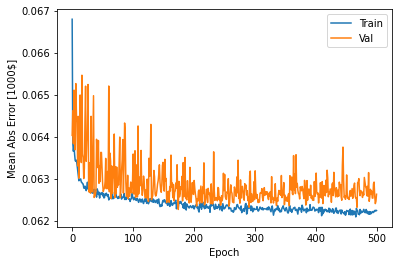

In [68]:
plot_history(history)